**Feature Importance and Removal using XGBoost - Activity 21**

**Classification using XGBClassifier()**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ProjDataAccidentDUICategorized.csv to ProjDataAccidentDUICategorized.csv


In [ ]:

! head -n 5 ProjDataAccidentDUICategorized.csv

STATE,PVH,PERNOTMVIT ,PERMVIT,PERSONS,DAY,MONTH,DAYofWEEK,NHS,Urban(1)orRural(2),FUNC_SYS,RD_OWNER,ROUTE,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,CF1,CF2,CF3,FATALS,MinutesOfDay,Drunk Driver Involved
1,1,0,1,1,5,1,6,1,1,1,1,1,0,14,0,0,1,1,0,2,4,1,0,0,0,1,2,0
1,0,0,2,2,8,1,2,1,2,1,1,1,0,38,0,1,12,1,0,3,2,2,20,0,0,2,1,0
1,0,0,2,2,8,1,2,1,1,1,1,1,0,24,0,0,1,1,1,4,2,10,0,0,0,1,1,0
1,0,0,2,2,9,1,3,1,1,1,1,1,0,24,0,0,1,1,0,4,1,10,0,0,0,1,3,0


In [ ]:
import numpy as np
dataset = np.genfromtxt('ProjDataAccidentDUICategorized.csv', delimiter=",", skip_header = True) 
np.random.shuffle(dataset)

In [ ]:
# Select last column (diabetes/not) as the output (Y)
Y = dataset[:, -1]
# All others as the input (X)
X = dataset[:, :-1]

In [ ]:
from sklearn.model_selection import train_test_split
xtr, xva, ytr, yva = train_test_split(X, Y, test_size = 0.2, random_state = 4123)

**Build and fit a model**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Following are some important parameters:
#  n_estimators=100
#  max_depth=3
xg_cla = xgb.XGBClassifier(n_estimators=450, max_depth=3)
# Try adding: , eval_set=[(xva, yva)]
xg_cla.fit(xtr, ytr)

#make predictions
y_predict = xg_cla.predict(xva)
predictions = [round(value) for value in y_predict]
accuracy = accuracy_score(yva, predictions)
print("Validation Accuracy: %.2f%%" % (accuracy * 100))

Validation Accuracy: 78.80%


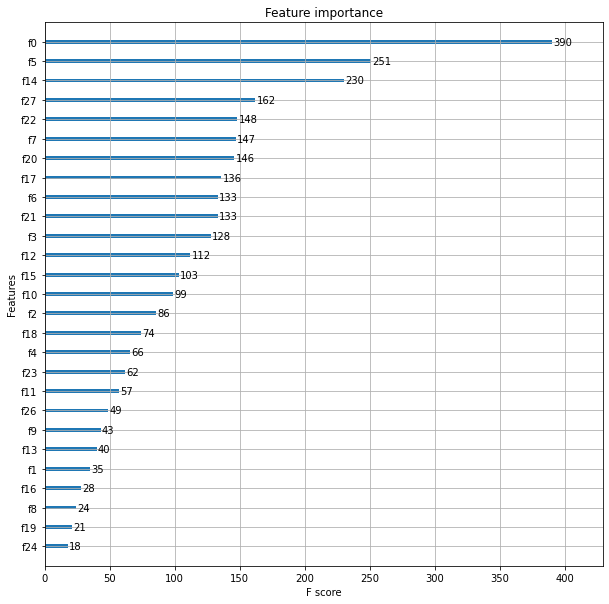

In [ ]:
from xgboost import plot_importance
plt.rcParams['figure.figsize'] = [10, 10]
plot_importance(xg_cla)


In [ ]:
#Iteratively remove features and display Accuary
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from numpy import loadtxt
from numpy import sort

# Run model using Feature Importance 
feature = sort(xg_cla.feature_importances_)
for x in feature:
	selection = SelectFromModel(xg_cla, threshold=x, prefit=True)
	select_X_train = selection.transform(xtr)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, ytr)
	# eval model
	select_X_test = selection.transform(xva)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(yva, predictions)
	print("n=%d, Accuracy: %.2f%%" % (select_X_train.shape[1], accuracy*100.0))

n=28, Accuracy: 78.25%
n=27, Accuracy: 78.25%
n=26, Accuracy: 78.26%
n=25, Accuracy: 78.04%
n=24, Accuracy: 78.24%
n=23, Accuracy: 78.34%
n=22, Accuracy: 78.31%
n=21, Accuracy: 78.31%
n=20, Accuracy: 78.31%
n=19, Accuracy: 78.01%
n=18, Accuracy: 78.19%
n=17, Accuracy: 78.26%
n=16, Accuracy: 78.29%
n=15, Accuracy: 78.24%
n=14, Accuracy: 78.19%
n=13, Accuracy: 78.16%
n=12, Accuracy: 78.15%
n=11, Accuracy: 77.92%
n=10, Accuracy: 77.89%
n=9, Accuracy: 77.97%
n=8, Accuracy: 77.69%
n=7, Accuracy: 77.70%
n=6, Accuracy: 77.72%
n=5, Accuracy: 77.31%
n=4, Accuracy: 77.00%
n=3, Accuracy: 76.99%
n=2, Accuracy: 76.85%
n=1, Accuracy: 74.49%


**Evaluate on the training set itself**

In [ ]:
preds = xg_cla.predict(xtr)

np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})
print(ytr[:10])
print(preds[:10])

[ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0]
[ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0]


**Evaluate on the validation set**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

preds = xg_cla.predict(xva)

np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})
print(yva[:10])
print(preds[:10])

#ToDo: Implement evaluation based on precision, accuracy, and recall

#Evaluations
y_predict = xg_cla.predict(xva)
predictions = [round(value) for value in y_predict]
Validation_Accuracy = accuracy_score(yva, predictions)
Validation_Precision = precision_score(yva, predictions)
Validation_Recall = recall_score(yva, predictions)
Validation_F1score = f1_score(yva, predictions)

print("Validation Accuracy: %.2f%%" % (Validation_Accuracy * 100.0))
print("Validation Precision: %.2f%%" % (Validation_Precision * 100.0))
print("Validation Recall: %.2f%%" % (Validation_Recall * 100.0))
print("Validation F1-score: %.2f" % (Validation_F1score))

[ 0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0]
[ 1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0]
Validation Accuracy: 78.80%
Validation Precision: 64.00%
Validation Recall: 38.61%
Validation F1-score: 0.48


**Visualize one of the trees**

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50, 10]

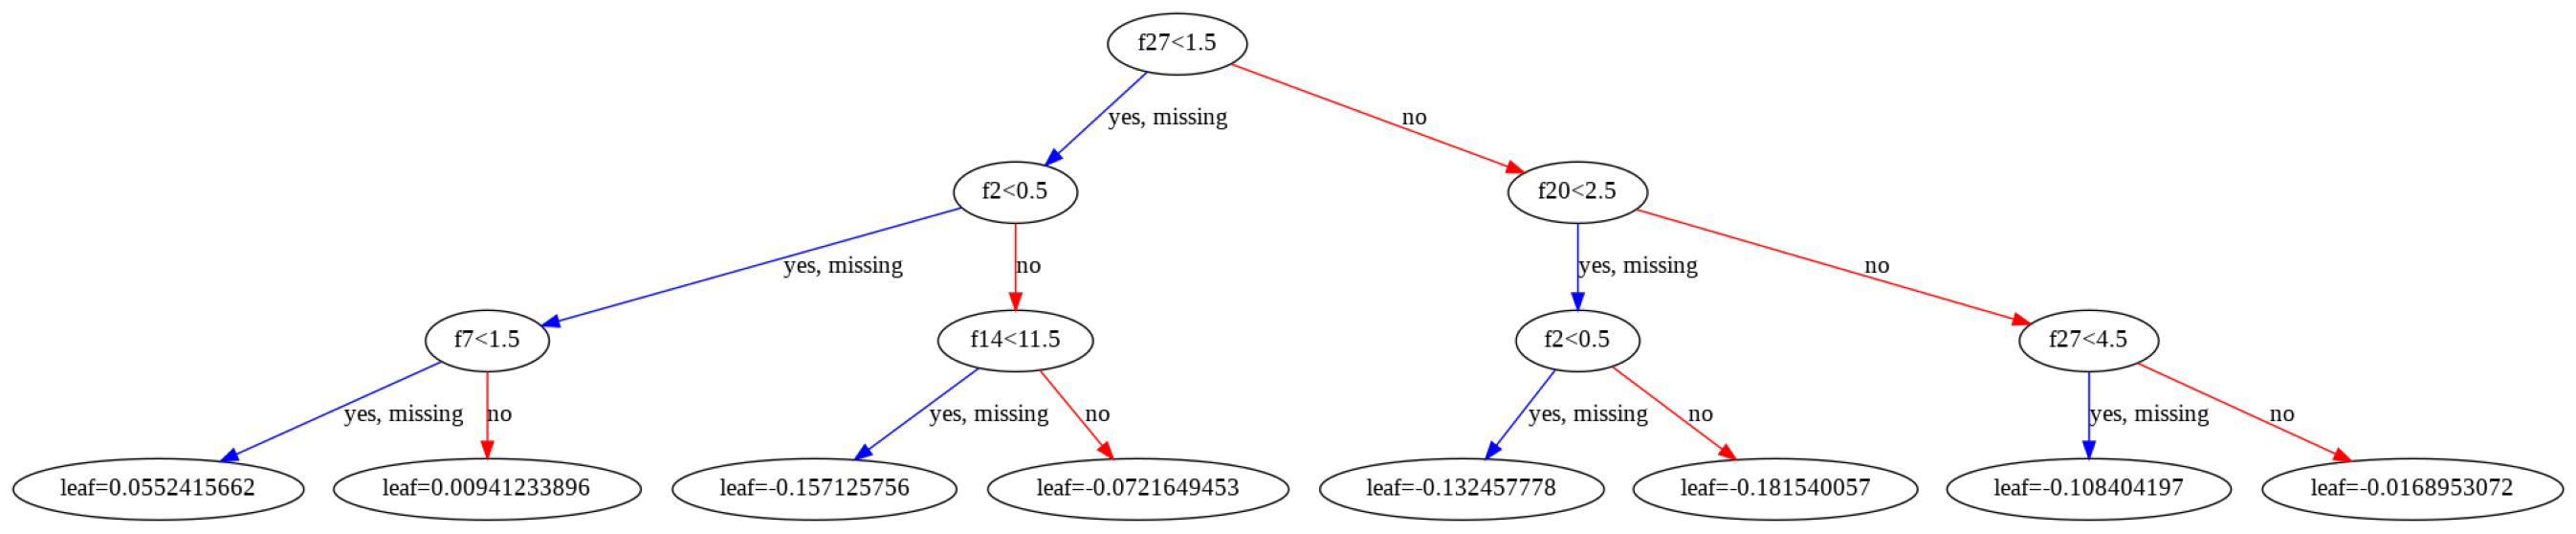

In [ ]:
xgb.plot_tree(xg_cla, num_trees=0)

**Visualize a tree with appropriate feature names**

In [ ]:
f = open('ProjDataAccidentDUICategorized.csv')
line = f.readline()
f.close()
cols = line.strip().split(',')
print(cols)
# Remove the output column
del cols[-1]
f = open('fmap.txt', 'w')
for i, col in enumerate(cols):
    f.write(str(i) + '\t' + str(col) + '\tq\n')
f.close()

! cat fmap.txt

['STATE', 'PVH', 'PERNOTMVIT ', 'PERMVIT', 'PERSONS', 'DAY', 'MONTH', 'DAYofWEEK', 'NHS', 'Urban(1)orRural(2)', 'FUNC_SYS', 'RD_OWNER', 'ROUTE', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'CF1', 'CF2', 'CF3', 'FATALS', 'MinutesOfDay', 'Drunk Driver Involved']
0	STATE	q
1	PVH	q
2	PERNOTMVIT 	q
3	PERMVIT	q
4	PERSONS	q
5	DAY	q
6	MONTH	q
7	DAYofWEEK	q
8	NHS	q
9	Urban(1)orRural(2)	q
10	FUNC_SYS	q
11	RD_OWNER	q
12	ROUTE	q
13	SP_JUR	q
14	HARM_EV	q
15	MAN_COLL	q
16	RELJCT1	q
17	RELJCT2	q
18	TYP_INT	q
19	WRK_ZONE	q
20	REL_ROAD	q
21	LGT_COND	q
22	WEATHER1	q
23	CF1	q
24	CF2	q
25	CF3	q
26	FATALS	q
27	MinutesOfDay	q


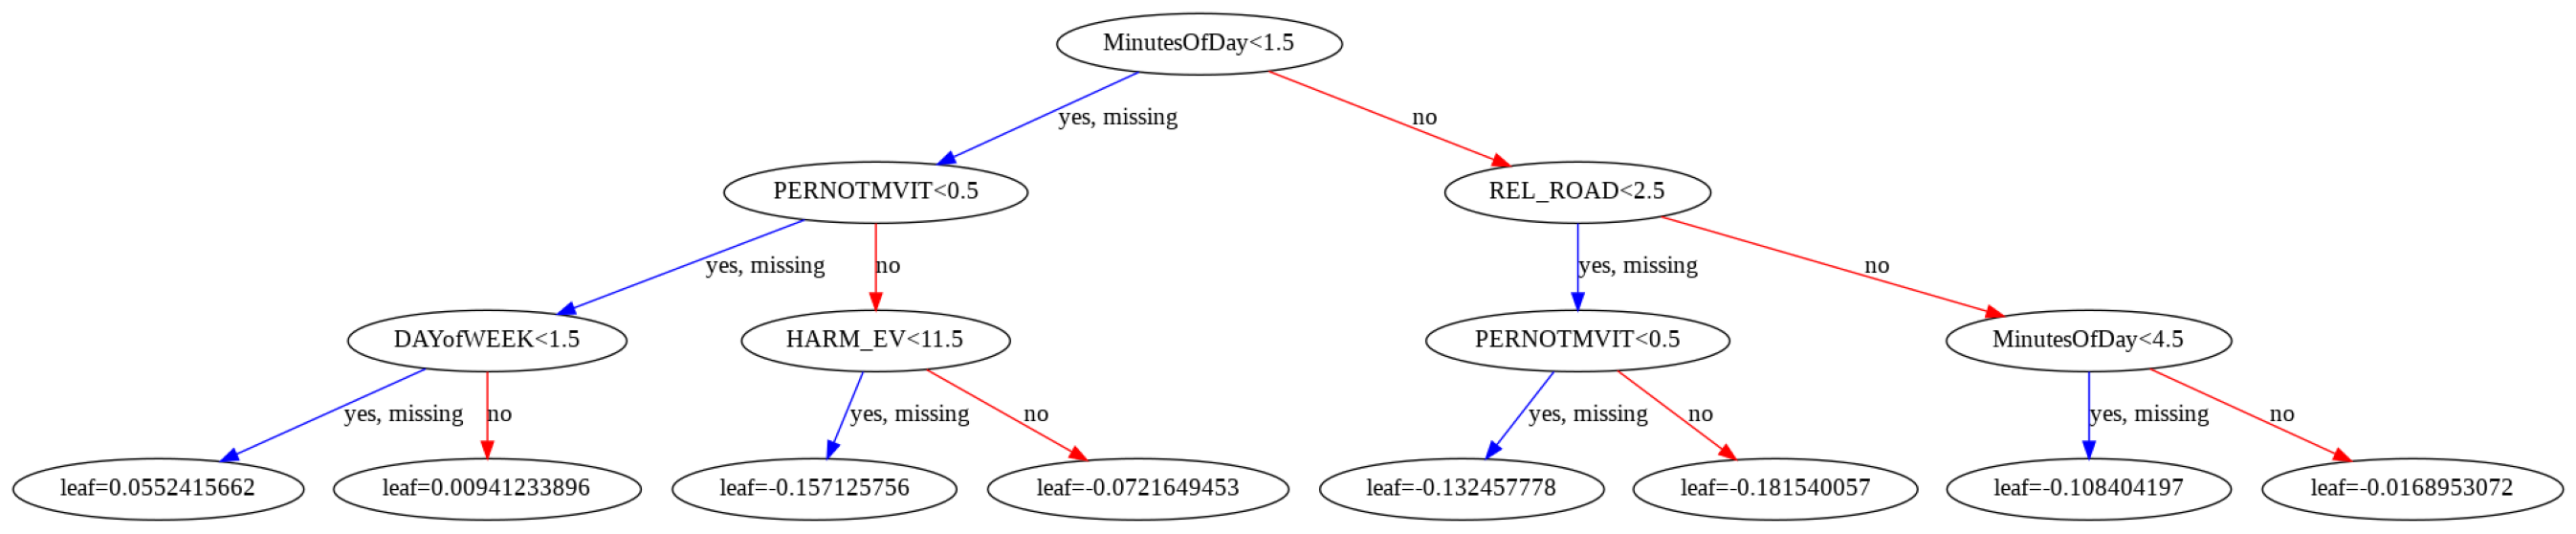

In [ ]:
xgb.plot_tree(xg_cla, num_trees=0, fmap='fmap.txt')